# DBSCAN

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
train=[]
for i in range(200):
    train.append(np.random.randint(low=1, high=100, size=2))
train = pd.DataFrame(train)
train.columns =['col1','col2']
train.head()

,col1,col2
0,45,77
1,37,35
2,41,52
3,92,88
4,74,63


In [3]:
min_ponints=int(input('enter minimum number of points'))
r=float(input('enter radious'))

enter minimum number of points9
enter radious9


In [4]:
#distance between two point
def distance(x1,x2):
    sum1=0
    for i in range(len(x1)):
        sum1+=(x1[i]-x2[i])**2
    return math.sqrt(sum1)

In [5]:
# main is a list. that contain all the index of data set
p=train.values
main=list(range(len(p)))

In [6]:
z=[]
for k in range(len(main)):
    k=main[0]
    index=[]
    for i in range(len(p)):
        if distance(p[k],p[i])<r:
            index.append(i)
    for i in index:
        for j in range(len(p)): 
            if distance(p[i],p[j])<r:
                if j not in index:
                    index.append(j)
    z.append(index)
    index=set(index)
    main=list(set(main)-index)
    main = main.copy()
    if len(main)==0:
        break
    

In [7]:
len(z)

11

# remove outlier

In [8]:
cluster=[]
for i in z:
    if len(i)>min_ponints:
        cluster.append(i)

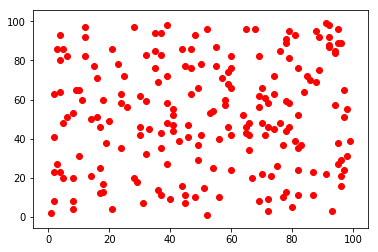

In [9]:
for i in range(len(train)):
    x=train.iloc[i:i+1,0:1].values
    y=train.iloc[i:i+1,1:2].values
    plt.scatter(x[0], y[0], c='r', label='data')
plt.show()

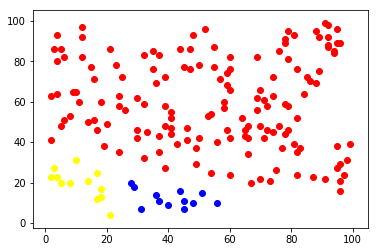

In [10]:
color=['red','blue','yellow','green','cyan','purple','magenta','burlywood','chartreuse']
count=0
for i in cluster:
    for j in i:
        x=train.iloc[j:j+1,0:1].values
        y=train.iloc[j:j+1,1:2].values        
        x=x[0]
        y=y[0]
        plt.scatter(x[0], y[0], color=color[count])
    count+=1
plt.show()